<a href="https://colab.research.google.com/github/RahulBhasin/New-York-City-Cab-Rides-Analysis/blob/master/New_York_Cab_Rides_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Cab Rides Analysis**

![alt text](https://s.abcnews.com/images/US/taxi-gty-er-190801_hpMain_2_16x9_992.jpg)

In this analysis we used New York City Taxi & Limousine Commission (TLC) dataset of February 2019 with 26+MM taxi trip records of Green Taxi, Yellow Taxi, Limo, Juno, Uber, Lyft and Via. Taken as a whole, the detailed trip-level data is more than just a vast list of taxi pick up and drop off coordinates: it’s a story of New York.

Key questions answered in this analysis are:

► What is Taxi Trips Market Share of various public and private taxis in NYC? How Pickup Volume in all boroughs for each cab type differs? Are there any patterns in hourly trip trends and average trip time?

► Are there untapped revenue opportunities at NYC Airports and using shared rides for NYC TLC?

► Can TLC unleash business potential by introducing Shared Rides?

► Which are the pick-up hotspots and can they be identified using clustering for day and night slots?

► How can we outsmart traffic in Manhattan and avoid unfriendly zones during traffic hours?


The analysis addresses all of these questions and many more.

**In this python notebook, we performed data-preprocessing and prepared dataset for K-means clustering and Tableau Data Visualization.**

In [1]:
# Importing libraies
import pandas as pd
import numpy as np 
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns',150)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#!pip install osgeo
#!jupyter nbextension enable codefolding/main

In [0]:
# Importing datasets
data_y    = pd.read_csv("2019 Datasets/yellow_tripdata_2019-02.csv")
data_g    = pd.read_csv("2019 Datasets/green_tripdata_2019-02.csv")
data_fhv  = pd.read_csv("2019 Datasets/fhv_tripdata_2019-02.csv")
data_fhvhv= pd.read_csv("2019 Datasets/fhvhv_tripdata_2019-02.csv")
locations = pd.read_csv("2019 Datasets/lat_long.csv")

In [0]:
# Checking datatypes and shapes of datasets
print(data_y.shape)
print(data_y.dtypes)

print(data_g.shape)
print(data_g.dtypes)

print(data_fhv.shape)
print(data_fhv.dtypes)

print(data_fhvhv.shape)
print(data_fhvhv.dtypes)

print(locations.shape)
print(locations.dtypes)

(7019375, 18)
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object
(575685, 20)
VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mt

In [0]:
#Cleaning data_y dataset
data_y.rename(columns = {'tpep_dropoff_datetime':'dropoff_datetime'}, inplace = True) 
data_y.rename(columns = {'tpep_pickup_datetime':'pickup_datetime'}, inplace = True) 
data_y["SR_Flag"] = [1 if i == 6 else 0 for i in data_y["RatecodeID"]]
data_y["cab_type"] = "Y"
data_y = data_y.drop(['congestion_surcharge','extra','fare_amount','improvement_surcharge','mta_tax','VendorID',
                      'store_and_fwd_flag','mta_tax','improvement_surcharge','tolls_amount',
                      'RatecodeID'], axis=1)

#Cleaning data_g dataset
data_g.rename(columns = {'lpep_dropoff_datetime':'dropoff_datetime'}, inplace = True) 
data_g.rename(columns = {'lpep_pickup_datetime':'pickup_datetime'}, inplace = True) 
data_g["SR_Flag"] = [1 if i == 6 else 0 for i in data_g["RatecodeID"]]
data_g["cab_type"] = "G"
data_g.rename(columns = {'lpep_dropoff_datetime':'tpep_dropoff_datetime'}, inplace = True) 
data_g.rename(columns = {'lpep_pickup_datetime':'tpep_pickup_datetime'}, inplace = True) 
data_g = data_g.drop(['congestion_surcharge','extra','fare_amount','improvement_surcharge','mta_tax','VendorID',
                      'store_and_fwd_flag','mta_tax','improvement_surcharge','tolls_amount',
                      'ehail_fee','trip_type','SR_Flag','RatecodeID'], axis=1)

#Cleaning data_fhv dataset
data_fhv["cab_type"] = "FHV"
data_fhv = data_fhv.drop(['dispatching_base_num'], axis=1)

#Cleaning data_fhvhv dataset
def map_values(row, values_dict):
    return values_dict[row]
values_dict = {'HV0002': 'Juno', 'HV0003': 'Uber', 'HV0004': 'Via', 'HV0005': 'Lyft'}
data_fhvhv['cab_type'] = data_fhvhv['hvfhs_license_num'].apply(map_values, args = (values_dict,))
data_fhvhv = data_fhvhv.drop(['dispatching_base_num','hvfhs_license_num'], axis=1)

locations = locations.drop(['OBJECTID','Shape_Leng','Shape_Area'], axis=1) #'X','Y',

In [0]:
# Verifying datatypes and shapes of cleaned datasets
print(data_y.shape)
print(data_y.dtypes)

print(data_g.shape)
print(data_g.dtypes)

print(data_fhv.shape)
print(data_fhv.dtypes)

print(data_fhvhv.shape)
print(data_fhvhv.dtypes)

print(locations.shape)
print(locations.dtypes)

(7019375, 11)
pickup_datetime      object
dropoff_datetime     object
passenger_count       int64
trip_distance       float64
PULocationID          int64
DOLocationID          int64
payment_type          int64
tip_amount          float64
total_amount        float64
SR_Flag               int64
cab_type             object
dtype: object
(575685, 10)
pickup_datetime      object
dropoff_datetime     object
PULocationID          int64
DOLocationID          int64
passenger_count       int64
trip_distance       float64
tip_amount          float64
total_amount        float64
payment_type          int64
cab_type             object
dtype: object
(1706745, 6)
pickup_datetime      object
dropoff_datetime     object
PULocationID          int64
DOLocationID          int64
SR_Flag             float64
cab_type             object
dtype: object
(20159102, 6)
pickup_datetime      object
dropoff_datetime     object
PULocationID          int64
DOLocationID          int64
SR_Flag             float64
cab_type

In [0]:
# Datasets concatenation and its glimpse
data_all=pd.concat([data_y,data_g,data_fhv,data_fhvhv], axis=0, ignore_index=True)
data_all.head()

/Users/rahulbhasin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,DOLocationID,PULocationID,SR_Flag,cab_type,dropoff_datetime,passenger_count,payment_type,pickup_datetime,tip_amount,total_amount,trip_distance
0,234,48,0.0,Y,2019-02-01 01:07:27,1.0,1.0,2019-02-01 00:59:04,2.0,12.3,2.1
1,93,230,0.0,Y,2019-02-01 01:03:58,1.0,2.0,2019-02-01 00:33:09,0.0,33.3,9.8
2,145,145,0.0,Y,2019-02-01 00:09:16,1.0,2.0,2019-02-01 00:09:03,0.0,3.8,0.0
3,95,95,0.0,Y,2019-02-01 00:51:10,1.0,2.0,2019-02-01 00:45:38,0.0,6.8,0.8
4,263,140,0.0,Y,2019-02-01 00:28:14,1.0,2.0,2019-02-01 00:25:30,0.0,6.3,0.8


In [0]:
# Replacing missing Share Ride flag values with O
print(data_all.shape)
data_all['SR_Flag'] = data_all['SR_Flag'].fillna(0)
data_all.head(10)

(29460907, 11)


,DOLocationID,PULocationID,SR_Flag,cab_type,dropoff_datetime,passenger_count,payment_type,pickup_datetime,tip_amount,total_amount,trip_distance
0,234,48,0.0,Y,2019-02-01 01:07:27,1.0,1.0,2019-02-01 00:59:04,2.0,12.3,2.10
1,93,230,0.0,Y,2019-02-01 01:03:58,1.0,2.0,2019-02-01 00:33:09,0.0,33.3,9.80
2,145,145,0.0,Y,2019-02-01 00:09:16,1.0,2.0,2019-02-01 00:09:03,0.0,3.8,0.00
3,95,95,0.0,Y,2019-02-01 00:51:10,1.0,2.0,2019-02-01 00:45:38,0.0,6.8,0.80
4,263,140,0.0,Y,2019-02-01 00:28:14,1.0,2.0,2019-02-01 00:25:30,0.0,6.3,0.80
5,141,229,0.0,Y,2019-02-01 00:40:57,1.0,2.0,2019-02-01 00:38:02,0.0,5.8,0.80
6,41,75,0.0,Y,2019-02-01 00:10:34,1.0,2.0,2019-02-01 00:06:49,0.0,6.3,0.90
7,229,246,0.0,Y,2019-02-01 00:24:27,1.0,2.0,2019-02-01 00:04:04,0.0,15.3,2.80
8,232,79,0.0,Y,2019-02-01 00:40:31,1.0,2.0,2019-02-01 00:28:20,0.0,11.8,2.10
9,234,170,0.0,Y,2019-01-31 23:19:11,1.0,1.0,2019-01-31 23:16:28,1.7,7.0,0.49


In [0]:
# Merging datasets
data_all=pd.merge(data_all,locations.add_suffix('_PU'),how='left',left_on=['PULocationID'],right_on=['LocationID_PU'])
data_all=pd.merge(data_all,locations.add_suffix('_DO'),how='left',left_on=['DOLocationID'],right_on=['LocationID_DO'])

In [0]:
data_all.head()

,DOLocationID,PULocationID,SR_Flag,cab_type,dropoff_datetime,passenger_count,payment_type,pickup_datetime,tip_amount,total_amount,trip_distance,X_PU,Y_PU,zone_PU,LocationID_PU,borough_PU,service_zone_PU,X_DO,Y_DO,zone_DO,LocationID_DO,borough_DO,service_zone_DO
0,234,48,0.0,Y,2019-02-01 01:07:27,1.0,1.0,2019-02-01 00:59:04,2.0,12.3,2.1,-73.989857,40.762237,Clinton East,48.0,Manhattan,Yellow Zone,-73.990478,40.740313,Union Sq,234.0,Manhattan,Yellow Zone
1,93,230,0.0,Y,2019-02-01 01:03:58,1.0,2.0,2019-02-01 00:33:09,0.0,33.3,9.8,-73.984176,40.759845,Times Sq/Theatre District,230.0,Manhattan,Yellow Zone,-73.841893,40.739235,Flushing Meadows-Corona Park,93.0,Queens,Boro Zone
2,145,145,0.0,Y,2019-02-01 00:09:16,1.0,2.0,2019-02-01 00:09:03,0.0,3.8,0.0,-73.948699,40.746590,Long Island City/Hunters Point,145.0,Queens,Boro Zone,-73.948699,40.746590,Long Island City/Hunters Point,145.0,Queens,Boro Zone
3,95,95,0.0,Y,2019-02-01 00:51:10,1.0,2.0,2019-02-01 00:45:38,0.0,6.8,0.8,-73.848220,40.723465,Forest Hills,95.0,Queens,Boro Zone,-73.848220,40.723465,Forest Hills,95.0,Queens,Boro Zone
4,263,140,0.0,Y,2019-02-01 00:28:14,1.0,2.0,2019-02-01 00:25:30,0.0,6.3,0.8,-73.954568,40.765507,Lenox Hill East,140.0,Manhattan,Yellow Zone,-73.951208,40.778496,Yorkville West,263.0,Manhattan,Yellow Zone


In [0]:
# Dropping unnecessary columns
data_all = data_all.drop(['LocationID_PU','LocationID_DO'], axis=1)
data_all.head()

,DOLocationID,PULocationID,SR_Flag,cab_type,dropoff_datetime,passenger_count,payment_type,pickup_datetime,tip_amount,total_amount,trip_distance,X_PU,Y_PU,zone_PU,borough_PU,service_zone_PU,X_DO,Y_DO,zone_DO,borough_DO,service_zone_DO
0,234,48,0.0,Y,2019-02-01 01:07:27,1.0,1.0,2019-02-01 00:59:04,2.0,12.3,2.1,-73.989857,40.762237,Clinton East,Manhattan,Yellow Zone,-73.990478,40.740313,Union Sq,Manhattan,Yellow Zone
1,93,230,0.0,Y,2019-02-01 01:03:58,1.0,2.0,2019-02-01 00:33:09,0.0,33.3,9.8,-73.984176,40.759845,Times Sq/Theatre District,Manhattan,Yellow Zone,-73.841893,40.739235,Flushing Meadows-Corona Park,Queens,Boro Zone
2,145,145,0.0,Y,2019-02-01 00:09:16,1.0,2.0,2019-02-01 00:09:03,0.0,3.8,0.0,-73.948699,40.746590,Long Island City/Hunters Point,Queens,Boro Zone,-73.948699,40.746590,Long Island City/Hunters Point,Queens,Boro Zone
3,95,95,0.0,Y,2019-02-01 00:51:10,1.0,2.0,2019-02-01 00:45:38,0.0,6.8,0.8,-73.848220,40.723465,Forest Hills,Queens,Boro Zone,-73.848220,40.723465,Forest Hills,Queens,Boro Zone
4,263,140,0.0,Y,2019-02-01 00:28:14,1.0,2.0,2019-02-01 00:25:30,0.0,6.3,0.8,-73.954568,40.765507,Lenox Hill East,Manhattan,Yellow Zone,-73.951208,40.778496,Yorkville West,Manhattan,Yellow Zone


In [0]:
# Cleaning Timestamp columns and exporting the cleaned dataset
def clean_date_time(date_time):
    date_time_c = datetime.strptime(date_time, "%Y-%m-%d %H:%M:%S")
    return date_time_c


yellow_taxi_data["dropoff_datetime"] = yellow_taxi_data["tpep_pickup_datetime"].apply(clean_date_time)
yellow_taxi_data["pickup_datetime"] = yellow_taxi_data["tpep_dropoff_datetime"].apply(clean_date_time)

data_all.head()

In [0]:
data_all.to_csv('data_all.csv')

In [0]:
# Frequency count for all variables
var = ['passenger_count','payment_type','borough_PU','service_zone_PU','borough_DO','service_zone_DO']
for v in var:
    print ('\nFrequency count for variable %s'%v)
    print (yellow_taxi_data[v].value_counts())


Frequency count for variable passenger_count
1    6963957
2    1402982
5     485394
3     391047
6     287226
4     182242
0        532
9         28
8         22
7         22
Name: passenger_count, dtype: int64

Frequency count for variable payment_type
1    6507001
2    3146683
3      46308
4      13459
5          1
Name: payment_type, dtype: int64

Frequency count for variable borough_PU
Manhattan        8857964
Queens            543068
Brooklyn          133437
Bronx               7790
EWR                  697
Staten Island        454
Name: borough_PU, dtype: int64

Frequency count for variable service_zone_PU
Yellow Zone    8637103
Boro Zone       465495
Airports        440115
EWR                697
Name: service_zone_PU, dtype: int64

Frequency count for variable borough_DO
Manhattan        8564715
Queens            452337
Brooklyn          447473
Bronx              56675
EWR                15819
Staten Island       2483
Name: borough_DO, dtype: int64

Frequency count for variable

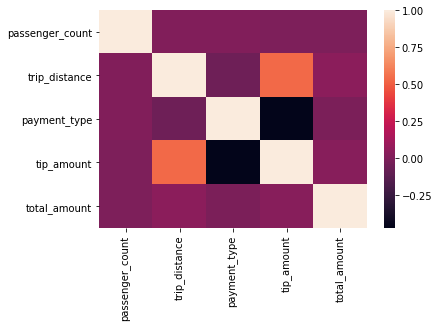

In [0]:
# Correlation among numerical variables
sns.heatmap(yellow_taxi_data[['passenger_count','trip_distance','payment_type','tip_amount','total_amount']].corr())

In [0]:
# Data preparation for pickup heatmap

yellow_taxi_data['tpep_pickup_datetime_day'] =yellow_taxi_data['tpep_pickup_datetime'].dt.weekday_name
yellow_taxi_data['tpep_pickup_datetime_hour']=yellow_taxi_data['tpep_pickup_datetime'].dt.hour

pv_1 = pd.pivot_table(yellow_taxi_data[['tpep_pickup_datetime_day', 'tpep_pickup_datetime_hour', 'payment_type']], index=['tpep_pickup_datetime_day', 'tpep_pickup_datetime_hour'], aggfunc='count')
pv_2 = pv_1.unstack(level=0)

pv_2 = pv_2.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

pv_2.head()

payment_type                                    \
tpep_pickup_datetime_day        Monday Tuesday Wednesday Thursday Friday   
tpep_pickup_datetime_hour                                                  
0                                29518   27715     25104    30737  42863   
1                                19901   15698     14876    17995  26810   
2                                13610    9758      9584    11852  18054   
3                                10046    6789      6584     8126  11904   
4                                10450    7968      6836     7670  10380   

                                           
tpep_pickup_datetime_day  Saturday Sunday  
tpep_pickup_datetime_hour                  
0                            69787  90867  
1                            59770  86545  
2                            49255  75851  
3                            36653  58986  
4                            24059  38736

In [0]:
morning_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "am"
    morning_hours.append(detailed_hour)
    
afternoon_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "pm"
    afternoon_hours.append(detailed_hour)
    
detailed_hours = ["12am"] + morning_hours + ["12pm"] + afternoon_hours

day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

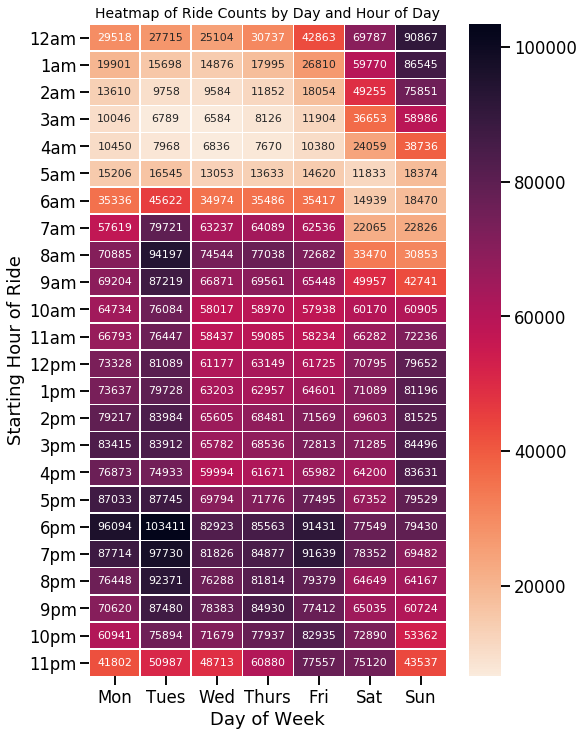

In [0]:
sns.set_context("talk")
f, ax = plt.subplots(figsize=(8,12))
cmap = sns.cm.rocket_r
ax = sns.heatmap(pv_2, annot=True,cmap=cmap, annot_kws={"fontsize": 11}, fmt="d", linewidths=.5, ax=ax, xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Heatmap of Ride Counts by Day and Hour of Day", fontsize=14, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Starting Hour of Ride');